<a href="https://colab.research.google.com/github/nityamshah/datascience/blob/main/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No. elpd_loo is only useful in comparison to another model. The more positive the elpd_loo, the better, but this only applies in comparison to another model.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when the model is based too much on the data given and not generalized. In other words, it is fit too much to the data and not able to accurately predict general scenarios of this data.

**Task3**:

How do we mitigate overfitting?

To mitigate overfitting (where the model is trained too well to the data and it might even capture random, unnecessary trends), you want to have a model with the smallest number of variables. Weakly informative priors also do a lot to prevent overfitting. Overall, you want to trend towards simpler models.

**Task4**:

How do we mitigate underfitting?

To account for underfitting, you can select a model based on elpd_loo to ensure the model still works well for the data.

**Task5**:

Why would we want more than one predictor in a model?

More than one predictor could be useful if there's a more complex relationship than just a single causation. If the variables you're trying to analyze are influenced by multiple factors, more than one predictor would be useful.

**Task6**:

Can we have too many predictors? How would we now?

You can have too many predictors that may lead to overfitting. If you see signs of overfitting this may mean you have too many predictors. You might want to make a causal diagram to ensure that the predictors you have are actually necessary and influential and then cross check this with the elpd_loo of different variable combinations.

**Task7**:

What is variable selection, and how does it work?

Variable selection is determining how many predictors you need (or if you even need more than one) and determining which ones you need. In variable selection you can compare different predictors to see which ones are better for your model.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

In terms of the basketball dataset, just adding the variables in the model (standard method) with a categorical variable creates a plot where all positions have the same slope in the plot. When you use the categorical variable as a hierarchy upon the other predictor variable, the slopes are not all the same for each position. As soon as you introduce the interaction of position, the slopes are different once again. This is similar to the second type of model. The slopes are different with the interaction because it realizes that FT% holds different value by position.



**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

If you have multiple predictors you need more dimensions to visualize them. Thus, to visualize the whole model you'd need a visual that has the appropriate amount of dimensions. If there's too many predictors, then you may not be able to visualize the whole model all at once.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [1]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-qpq4qq2a
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-qpq4qq2a
  Resolved https://github.com/pydata/xarray.git to commit 6bea71572120c0eef2e4bf8d269d32b17a39dc35
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached bambi-0.15.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached formulae-0.5.4-py3-none-any.whl.metadata (4.5 kB)
Using cached bambi-0.15.0-py3-none-any.whl (109 kB)
Using cached formulae-0.5.4-py3-none-any.whl (53 kB)


In [4]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [5]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 33 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

Output()

Output()

Output()

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

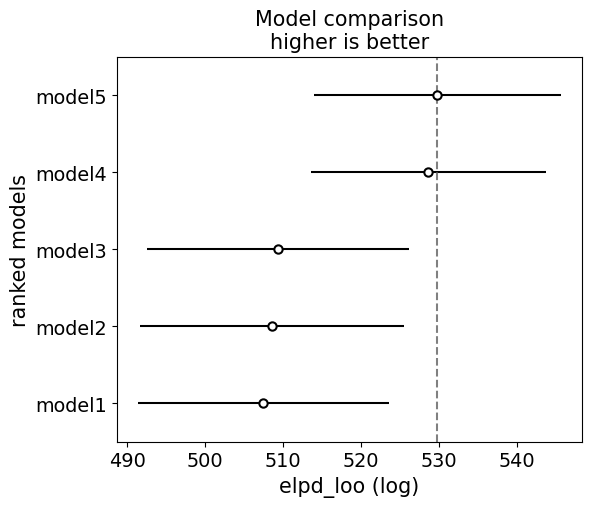

In [8]:
#define the model
model_1 = bmb.Model("FGp ~ FTp + Pos", data=bb)
#fit the model
idata_model_1 = model_1.fit(idata_kwargs={'log_likelihood': True})

#define the model, but as a hierarchy
model_2 = bmb.Model("FGp ~ (FTp|Pos)", data=bb)
#create the model
idata_model_2 = model_2.fit(idata_kwargs={'log_likelihood': True})

#define the model; bb_inter stands for baskeball interaction
model_3 = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", data=bb)
#create the model
idata_model_3 = model_3.fit(idata_kwargs={'log_likelihood': True})

#define the model with interactions between all 3 predictors
model_4 = bmb.Model("FGp ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb)
#create the model
idata_model_4 = model_4.fit(idata_kwargs={'log_likelihood': True})

#define the model with interactions between 3pa and posiiton
model_5 = bmb.Model("FGp ~ FTp + Pos + `3PA` + Pos:`3PA`", data=bb)
#create the model
idata_model_5 = model_5.fit(idata_kwargs={'log_likelihood': True})

loo_1 = az.loo(idata_model_1)
loo_2 = az.loo(idata_model_2)
loo_3 = az.loo(idata_model_3)
loo_4 = az.loo(idata_model_4)
loo_5 = az.loo(idata_model_5)

cmp_df = az.compare( {"model1":idata_model_1, "model2":idata_model_2, "model3":idata_model_3, "model4":idata_model_4, "model5":idata_model_5} )
cmp_df
az.plot_compare(cmp_df)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According the elpd_loo comparison metric, model_4 and model_5 (interactions between all three predictors and interactions between 3PA+position) are better. However all 5 models have significant overlap, signaling that the others aren't too bad either. Model_4 and Model_5 seem to be almost identical.

